# 1. 준비
### (1) 패키지 import

In [1]:
# 패키지 import

import pandas as pd
import matplotlib.pyplot as plt
import ta

In [23]:
!pip install pyarrow

   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   -- ------------------------------------- 1.8/25.3 MB 10.1 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/25.3 MB 11.2 MB/s eta 0:00:02
   ---------- ----------------------------- 6.8/25.3 MB 11.3 MB/s eta 0:00:02
   -------------- ------------------------- 9.2/25.3 MB 11.7 MB/s eta 0:00:02
   ------------------ --------------------- 11.5/25.3 MB 11.6 MB/s eta 0:00:02
   ---------------------- ----------------- 13.9/25.3 MB 11.6 MB/s eta 0:00:01
   ------------------------- -------------- 16.3/25.3 MB 11.6 MB/s eta 0:00:01
   ----------------------------- ---------- 18.6/25.3 MB 11.6 MB/s eta 0:00:01
   --------------------------------- ------ 21.0/25.3 MB 11.6 MB/s eta 0:00:01
   ------------------------------------ --- 23.3/25.3 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  25.2/25.3 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 25.3/25.3 MB 10.9 MB/

### (2) 데이터 불러오기

In [2]:
# 데이터 불러오기

d = pd.read_parquet('005930.parquet')
d

,timestamp,ticker,open,high,low,close,volume
0,20100104,005930,16060.0,16180.0,16000.0,16180.0,11963550.0
1,20100105,005930,16520.0,16580.0,16300.0,16440.0,27960950.0
2,20100106,005930,16580.0,16820.0,16520.0,16820.0,22987750.0
3,20100107,005930,16820.0,16820.0,16260.0,16260.0,22161850.0
4,20100108,005930,16400.0,16420.0,16120.0,16420.0,14789900.0
...,...,...,...,...,...,...,...
3529,20240423,005930,76400.0,76800.0,75500.0,75500.0,18717699.0
3530,20240424,005930,77500.0,78800.0,77200.0,78600.0,22166150.0
3531,20240425,005930,77300.0,77500.0,76300.0,76300.0,15549134.0
3532,20240426,005930,77800.0,77900.0,76500.0,76700.0,12755629.0


### (3) 데이터 준비

In [3]:
# 필요한 데이터 컬럼 생성

# 오늘 포함 과거 5일 종가 중 최고값
d['5d_max'] = d.rolling(5)['close'].max()

# 오늘 포함 과거 5일 종가 중 최저값
d['5d_min'] = d.rolling(5)['close'].min() 

# 전일 종가
d['last_1d_close'] = d['close'].shift(1) 

# 20일 이동평균
d['20d_mean'] = d.rolling(20)['close'].mean() 

In [4]:
d

,timestamp,ticker,open,high,low,close,volume,5d_max,5d_min,last_1d_close,20d_mean
0,20100104,005930,16060.0,16180.0,16000.0,16180.0,11963550.0,NaN,NaN,NaN,NaN
1,20100105,005930,16520.0,16580.0,16300.0,16440.0,27960950.0,NaN,NaN,16180.0,NaN
2,20100106,005930,16580.0,16820.0,16520.0,16820.0,22987750.0,NaN,NaN,16440.0,NaN
3,20100107,005930,16820.0,16820.0,16260.0,16260.0,22161850.0,NaN,NaN,16820.0,NaN
4,20100108,005930,16400.0,16420.0,16120.0,16420.0,14789900.0,16820.0,16180.0,16260.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3529,20240423,005930,76400.0,76800.0,75500.0,75500.0,18717699.0,79600.0,75500.0,76100.0,81480.0
3530,20240424,005930,77500.0,78800.0,77200.0,78600.0,22166150.0,79600.0,75500.0,75500.0,81415.0
3531,20240425,005930,77300.0,77500.0,76300.0,76300.0,15549134.0,78600.0,75500.0,78600.0,81240.0
3532,20240426,005930,77800.0,77900.0,76500.0,76700.0,12755629.0,78600.0,75500.0,76300.0,81035.0


### (4) 매매 시그널 생성

In [5]:
# 종가가 5일 최저가이고, 20일 이동평균보다 낮은 시점만 뽑기
buy = d[(d['close'] == d['5d_min']) & (d['close'] < d['20d_mean'])]

In [6]:
buy

,timestamp,ticker,open,high,low,close,volume,5d_max,5d_min,last_1d_close,20d_mean
19,20100129,005930,16000.0,16020.0,15600.0,15680.0,22864250.0,16840.0,15680.0,16160.0,16402.0
20,20100201,005930,15680.0,15700.0,15300.0,15540.0,25052100.0,16300.0,15540.0,15680.0,16370.0
21,20100202,005930,15800.0,15800.0,15400.0,15440.0,19690150.0,16160.0,15440.0,15540.0,16320.0
24,20100205,005930,15160.0,15220.0,14940.0,15000.0,25751700.0,15540.0,15000.0,15520.0,16148.0
25,20100208,005930,14940.0,15080.0,14820.0,14960.0,21980400.0,15540.0,14960.0,15000.0,16099.0
...,...,...,...,...,...,...,...,...,...,...,...
3524,20240416,005930,81200.0,81300.0,79400.0,80000.0,31949845.0,84100.0,80000.0,82200.0,81400.0
3525,20240417,005930,80700.0,80800.0,78900.0,78900.0,22611631.0,84100.0,78900.0,80000.0,81705.0
3527,20240419,005930,78300.0,78700.0,76300.0,77600.0,31317563.0,82200.0,77600.0,79600.0,81755.0
3528,20240422,005930,77400.0,77500.0,75100.0,76100.0,30469477.0,80000.0,76100.0,77600.0,81615.0


---
# 2. 분석

### (1) 매수 시그널 plotting

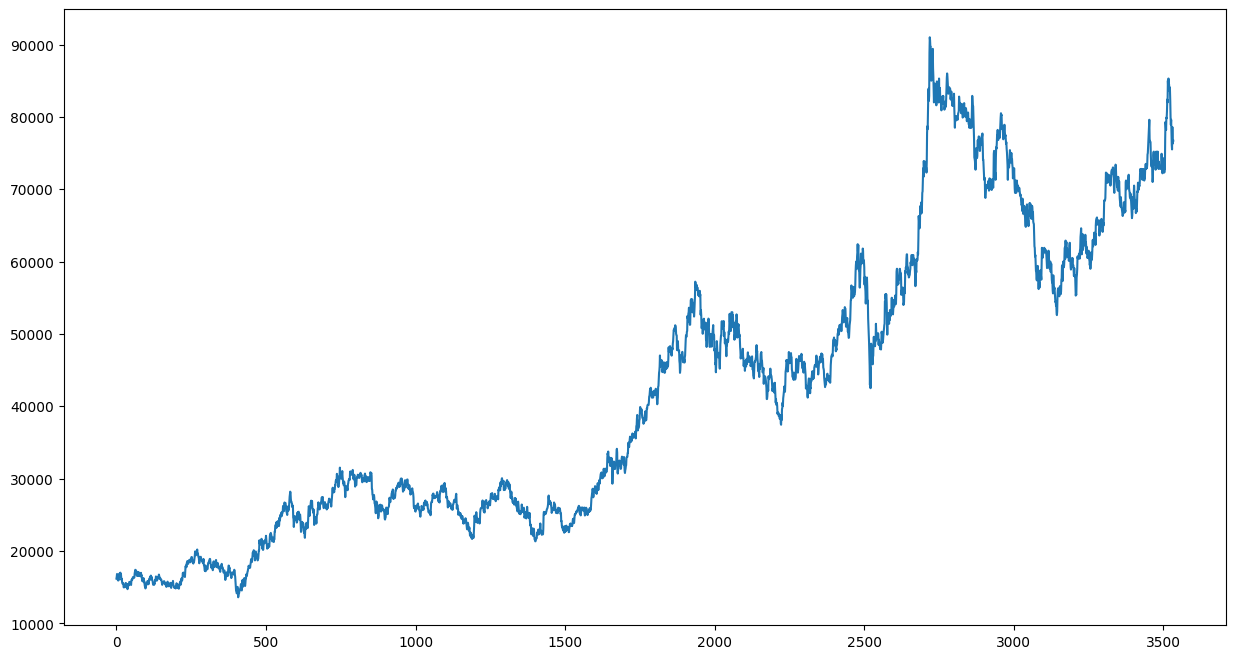

In [7]:
# plt.plot을 활용해 주가 그래프 출력

plt.figure(figsize=(15,8))
plt.plot(d['close'])

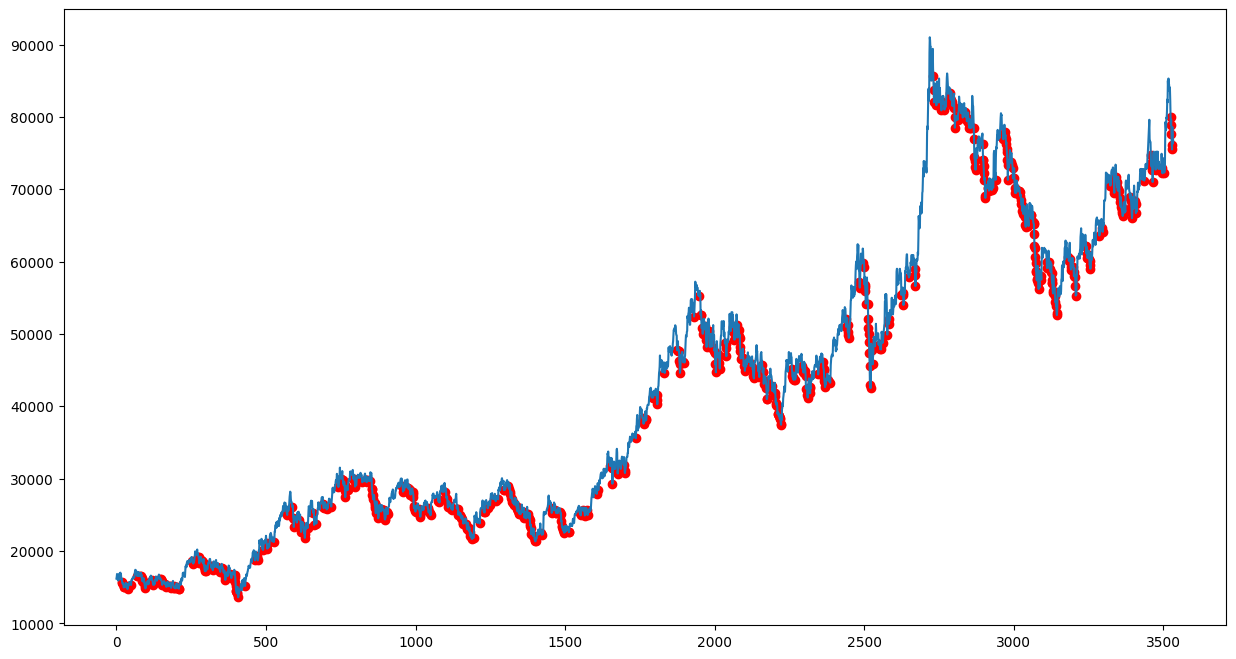

In [8]:
# 주가 그래프에 매수 타점 표시

plt.figure(figsize=(15,8))
plt.plot(d['close'])
plt.scatter(buy.index,buy['close'],c='r')

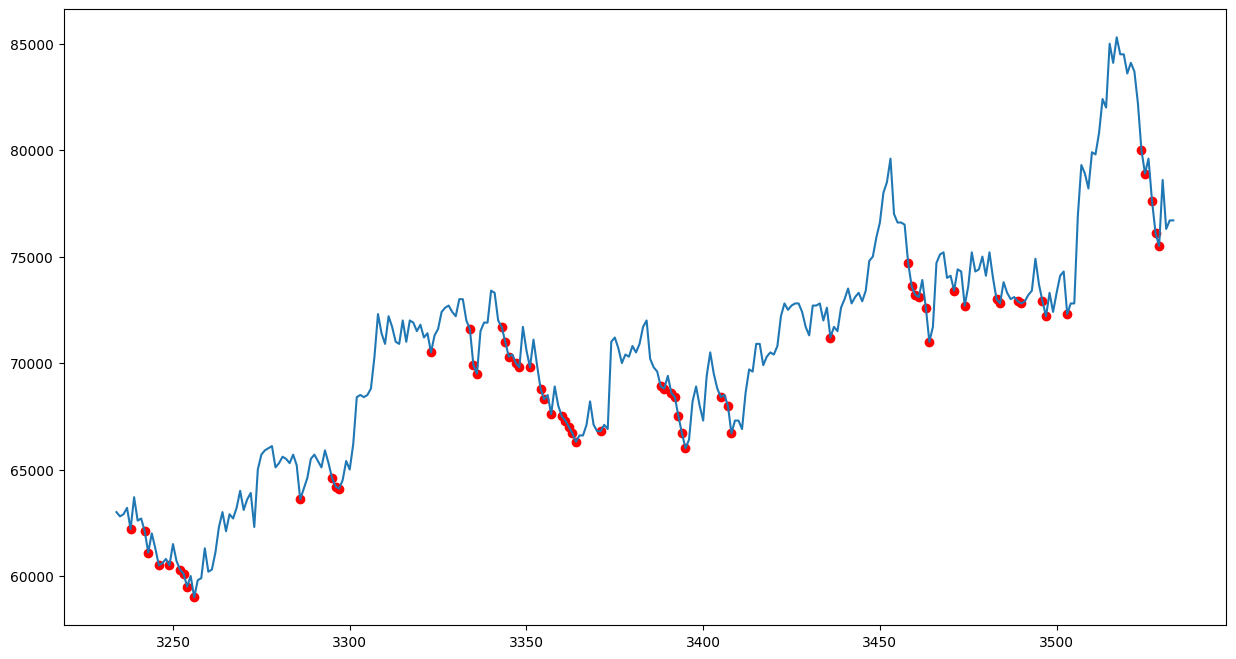

In [9]:
# 최근 300일만 뽑아 매수 타점 표시

d_sample = d.iloc[-300:]
buy_sample = d_sample[(d_sample['close'] == d_sample['5d_min']) & (d_sample['close'] < d_sample['20d_mean'])]

plt.figure(figsize=(15,8))
plt.plot(d_sample['close'])
plt.scatter(buy_sample.index,buy_sample['close'],c='r')